<a href="https://colab.research.google.com/github/AllenHichard/Analise_Algoritmos/blob/main/Mediana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algoritmos

In [41]:
def bubble_sort(A):
    for i in range(len(A)-1, 0, -1):
        for j in range(0, i):
            if (A[j+1] < A[j]):
                A[j], A[j+1] = A[j+1], A[j]
    return A


def mediana_Naive(A, l, r, k): #l,r,k foram introduzidos para faciltiar a chamada de funções
    #A = sorted(A)
    A = bubble_sort(A)
    mediana = A[int((len(A)-1)/2)]  #len(L)-1 to pick up the left element for the even size vector
    #print("A mediana foi - ", mediana)
    return mediana

def lomuto_partition(A, l, r):
    p = A[l]
    s = l
    for i in range(l+1, r):
        if A[i] < p:
            s += 1
            A[s], A[i] = A[i], A[s]
    A[l], A[s] = A[s], A[l]
    return s

def mediana_QuickSelect(A, l, r, k):
    s = lomuto_partition(A,l,r)
    if s == k-1:
        mediana = A[s]
        #print(mediana_Naive(A, l, r, k) == mediana)
        return mediana
    else:
        if s > k-1:
            return mediana_QuickSelect(A, l, s, k) # retirei o -1 do terceiro parâmetro por causa do intervalo aberto (range do for)
        else:
            return mediana_QuickSelect(A, s+1, r, k)

  

Coleta de dados dos experimentos

In [ ]:
import time
from numpy import random
DOMAIN = 10000000000 ##Você deve escolher um valor mais adequado
def avg_time(domain, tam, func, rounds): 
  sum = float(0)
  for i in range(rounds):
    #create a list with random numbers
    random.seed(i)
    L=list(random.randint(tam+domain, size=tam))
    start = time.time()    
    k = int((len(L)+1)/2)
    func(L, 0, len(L), k)
    end = time.time()
    sum += end-start
  return sum/rounds

#defines the algorithms to be processed
algorithms = [mediana_Naive, mediana_QuickSelect]

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 2000

sizes = [500,1000,1500,2000,2500] ##você deve escolher tamanhos mais adequados
mapSizeToTime = dict()
for i in range(len(sizes)):
  print(f"Starting experiments for datasets with size={sizes[i]}, each experiment has {num_rounds} rounds.")
  
  ##Map list size to algorithm average time
  for algorithm in algorithms:      
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avg_time(DOMAIN, sizes[i], algorithm, num_rounds)
  
print(f"Finish data collection")

Starting experiments for datasets with size=500, each experiment has 2000 rounds.
Starting experiments for datasets with size=1000, each experiment has 2000 rounds.
Starting experiments for datasets with size=1500, each experiment has 2000 rounds.


Formata os dados do experimento para serem exibidos

In [39]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
mediana_Naive##500,0.000127,mediana_Naive,500
mediana_QuickSelect##500,0.000312,mediana_QuickSelect,500
mediana_Naive##1000,0.000278,mediana_Naive,1000
mediana_QuickSelect##1000,0.000637,mediana_QuickSelect,1000
mediana_Naive##1500,0.000437,mediana_Naive,1500
mediana_QuickSelect##1500,0.000963,mediana_QuickSelect,1500
mediana_Naive##2000,0.000607,mediana_Naive,2000
mediana_QuickSelect##2000,0.001281,mediana_QuickSelect,2000
mediana_Naive##2500,0.000788,mediana_Naive,2500
mediana_QuickSelect##2500,0.001621,mediana_QuickSelect,2500


Resultado do experimento (gráfico)

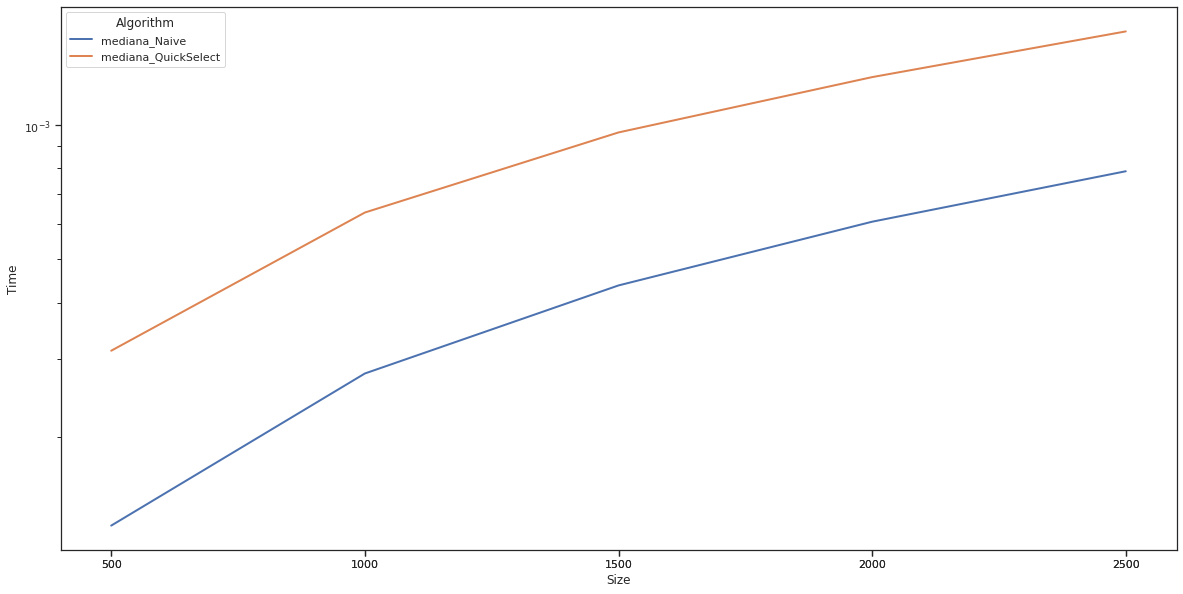

In [40]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
g.set_yscale('log')
g.set(xticks=[i for i in df.Size])
plt.show()